#Dataset used
https://www.kaggle.com/jessevent/all-crypto-currencies

Cryptocurrency Market Data
Historical Cryptocurrency Prices For ALL Tokens!

In [ ]:
!pip install mpl_finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc

# Default number of currencies we will look at at each step
x = 10

In [ ]:
#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving crypto-markets.csv to crypto-markets (1).csv


In [ ]:
df = pd.read_csv('crypto-markets.csv')
#df = pd.read_csv('consolidated_coin_data.csv')
#df.info()
#btc = pd.read_csv('BTC-USD.csv')

#df.head()

In [ ]:
# Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df['date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [ ]:
# Get a df containing only the latest date's data for each currency
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
#latest_df = df[df['Date'] == max(df['Date'])]
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
2041,bitcoin,BTC,Bitcoin,2018-11-29,1,4269.000000,4413.020000,4145.770000,4278.850000,6.503348e+09,7.445102e+10,0.4980,267.25
3985,ripple,XRP,XRP,2018-11-29,2,0.391862,0.392465,0.373789,0.379562,6.299006e+08,1.530674e+10,0.3091,0.02
5196,ethereum,ETH,Ethereum,2018-11-29,3,122.720000,123.230000,115.300000,117.540000,2.196099e+09,1.216629e+10,0.2825,7.93
6774,stellar,XLM,Stellar,2018-11-29,4,0.161831,0.172107,0.155423,0.165080,8.886206e+07,3.162026e+09,0.5788,0.02
7269,bitcoin-cash,BCH,Bitcoin Cash,2018-11-29,5,190.100000,191.150000,176.830000,180.980000,8.916690e+07,3.164359e+09,0.2898,14.32


In [ ]:
# Number of cryptocurrencies listed
#latest_df.shape
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()
#latest_df['Currency'].nunique()

Number of cryptocurrencies listed


1001

In [ ]:
# What start date do we have for each cryptocurrency?
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
107,Bitcoin,1,2013-04-28
669,Peercoin,159,2013-04-28
616,Novacoin,700,2013-04-28
591,Namecoin,371,2013-04-28
509,Litecoin,7,2013-04-28
861,Terracoin,895,2013-04-28
350,Feathercoin,415,2013-05-03
397,GoldCoin,884,2013-06-14
49,Argentum,969,2013-07-04
691,Primecoin,361,2013-07-11


In [ ]:
# List the newest ones
print("Newest Cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

Newest Cryptocurrencies


,name,ranknow,start_date
191,Coin Lion,873,2018-11-06
462,InterValue,847,2018-11-07
433,Humanscape,321,2018-11-08
641,Optimal Shelf Availability Token,184,2018-11-08
117,Bitcoin SV,9,2018-11-09
547,Menlo One,710,2018-11-09
67,BDT Token,590,2018-11-14
932,Vites,721,2018-11-14
431,Howdoo,588,2018-11-15
153,Business Credit Alliance Chain,453,2018-11-21


In [ ]:
# Get a list of the top x currencies
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

ranknow
1          [Bitcoin]
2              [XRP]
3         [Ethereum]
4          [Stellar]
5     [Bitcoin Cash]
6              [EOS]
7         [Litecoin]
8           [Tether]
9       [Bitcoin SV]
10         [Cardano]
Name: name, dtype: object

In [ ]:
# Is ranknow ordering the same as the marketcap ordering?
latest_df.sort_values(by=['market'], ascending=[False])
latest_df[['name','market']].head(x)

# Answer: Yes

,name,market
2041,Bitcoin,7.445102e+10
3985,XRP,1.530674e+10
5196,Ethereum,1.216629e+10
6774,Stellar,3.162026e+09
7269,Bitcoin Cash,3.164359e+09
7786,EOS,2.738537e+09
9828,Litecoin,2.006242e+09
11197,Tether,1.851553e+09
11218,Bitcoin SV,1.714035e+09
11643,Cardano,1.085456e+09


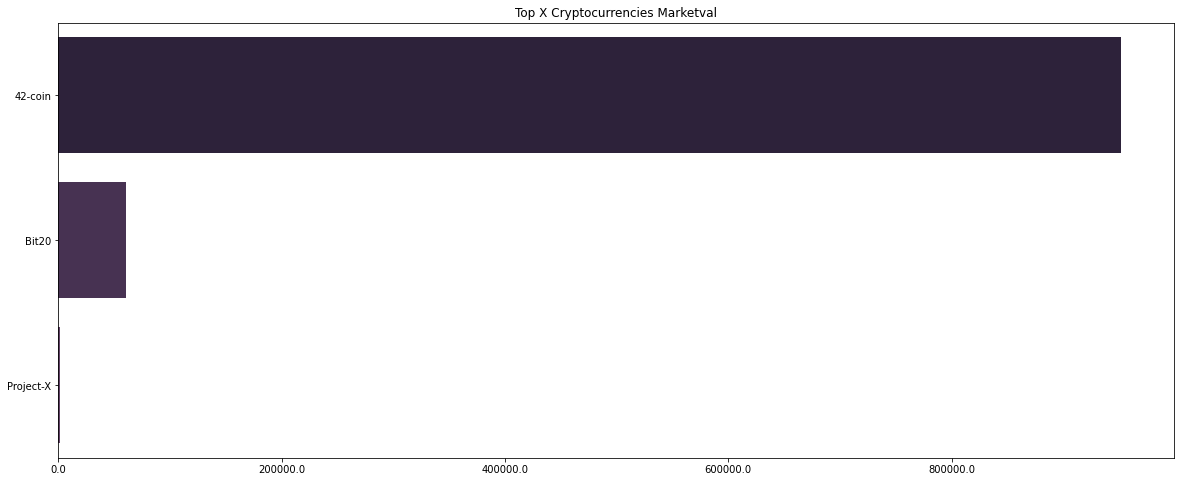

In [ ]:
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

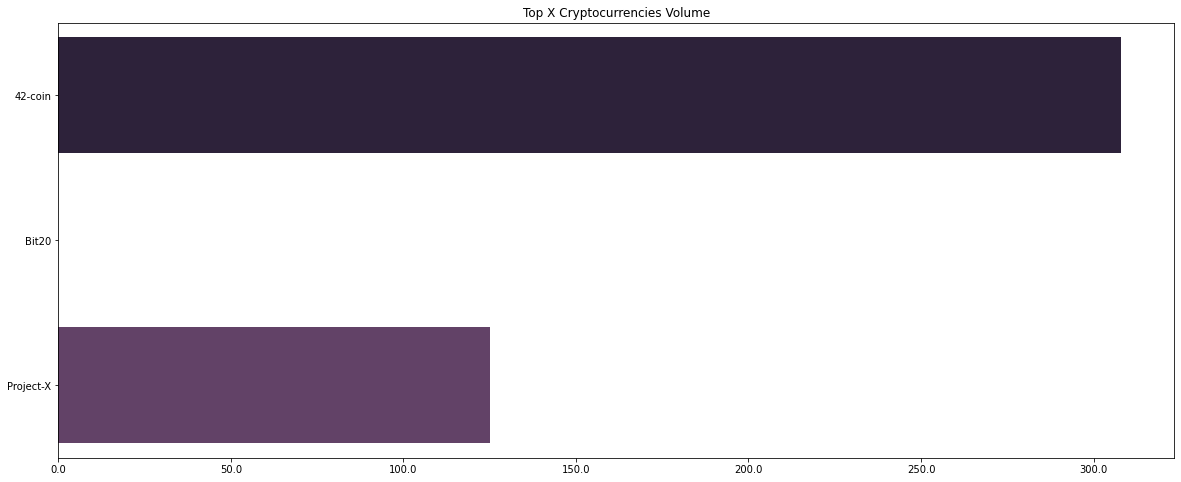

In [ ]:
# Plot the top X currencies latest volume 
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])
        
f, ax = plt.subplots(figsize=(20, 8)) 
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

Moving Averages 
Let’s now consider how we can find trends in stocks.

A n-day moving average is, for a series and a point in time, the average of the past n days.

Moving averages smooth a series and helps identify trends. The larger n is, the less responsive a moving average process is to short-term fluctuations in the series. The idea is that moving average processes help identify trends from “noise”.

Exponentially Weighted Moving Average is a statistic for monitoring the process that averages the data in a way that gives less and less weight to data as they are further removed in time.

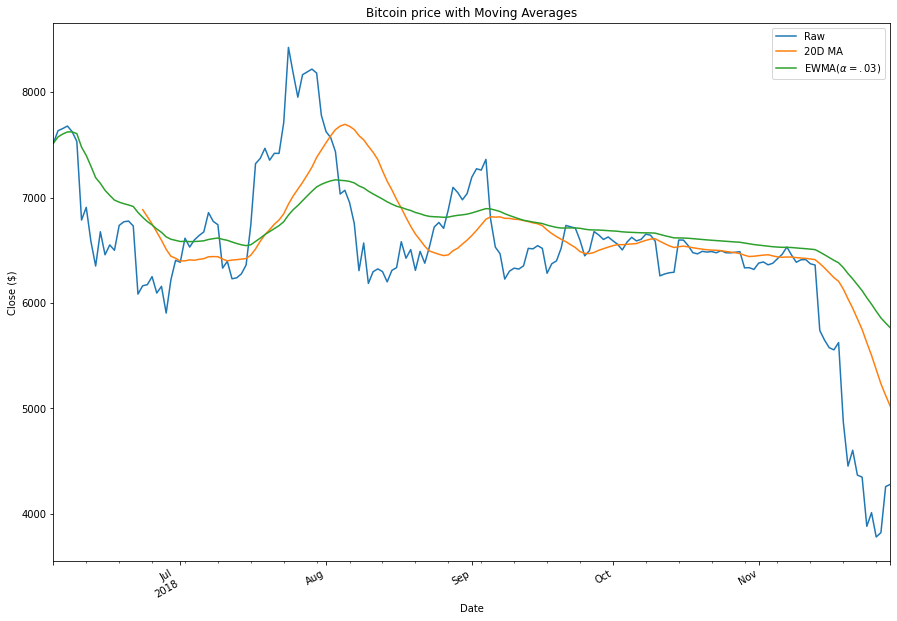

In [ ]:
# Moving average chart for Rank 1 currency (6 months)
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

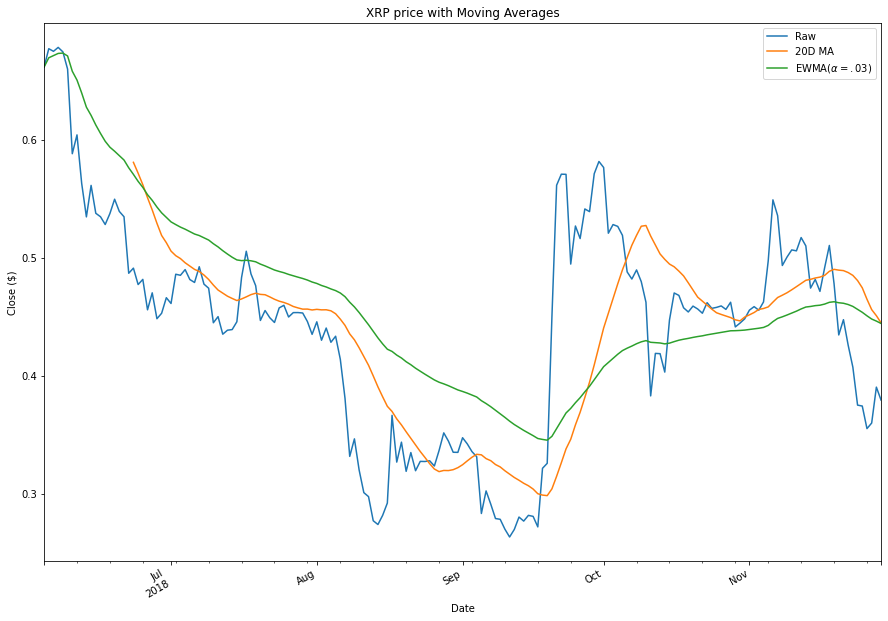

In [ ]:
# Moving average chart for Rank 2 currency (6 months)
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

Some consider there to be three important moving averages that can be applied to charts to help trade better. They are the following:

The 20 moving average (20MA) is the short-term outlook.
The 50 moving average (50MA) is the medium term outlook.
The 200 moving average (200MA) is the trend bias.
In a good uptrend the price should be above the 20MA, the 20MA above the 50MA and the 50MA above the 200MA. In a solid downtrend the price will be below the 20MA, the 20MA below the 50MA and the 50MA below the 200MA.

Lets see how this can apply to Bitcoin and Ethereum..

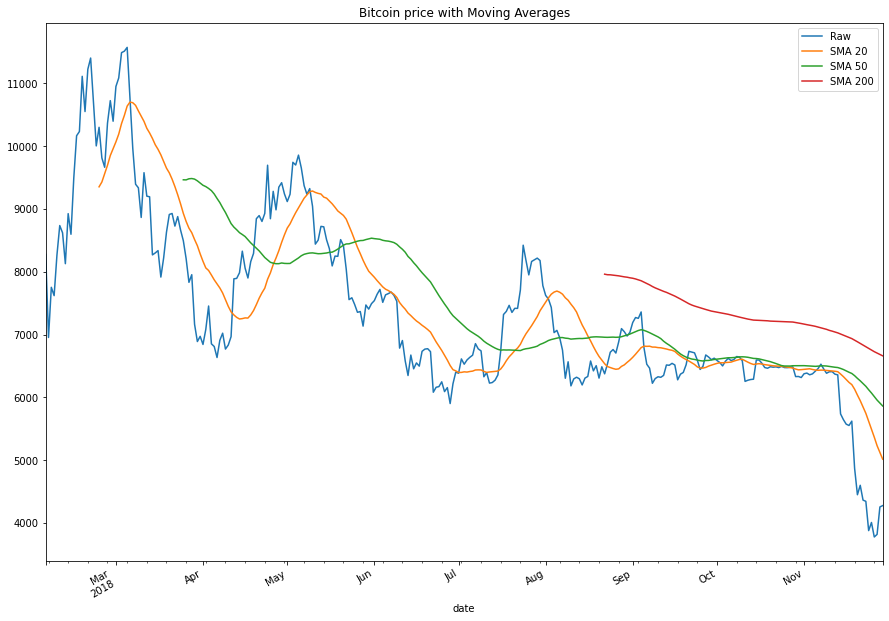

In [ ]:
# Moving average chart for Rank 1 currency (10 months)
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

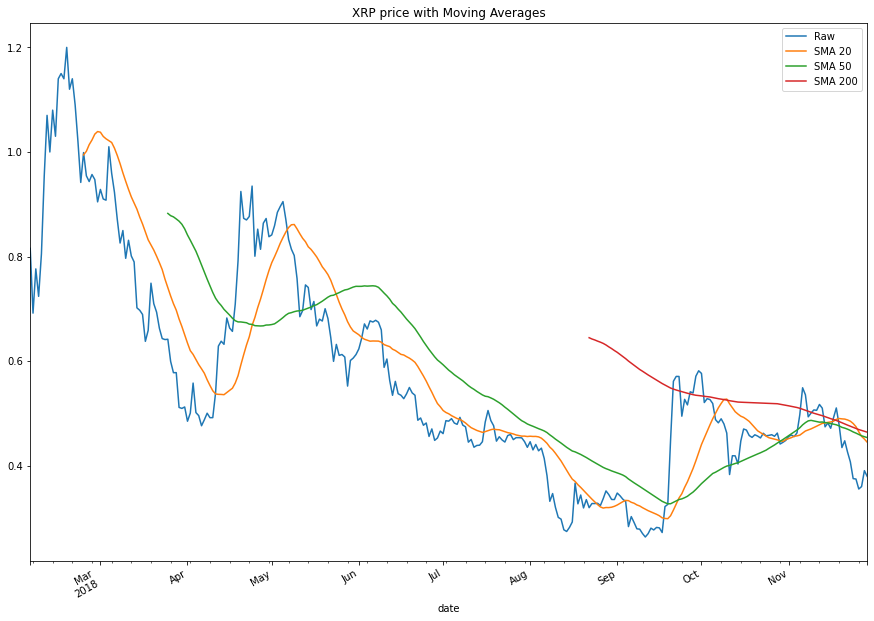

In [ ]:
# Moving average chart for Rank 2 currency (10 months)
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()
 
smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

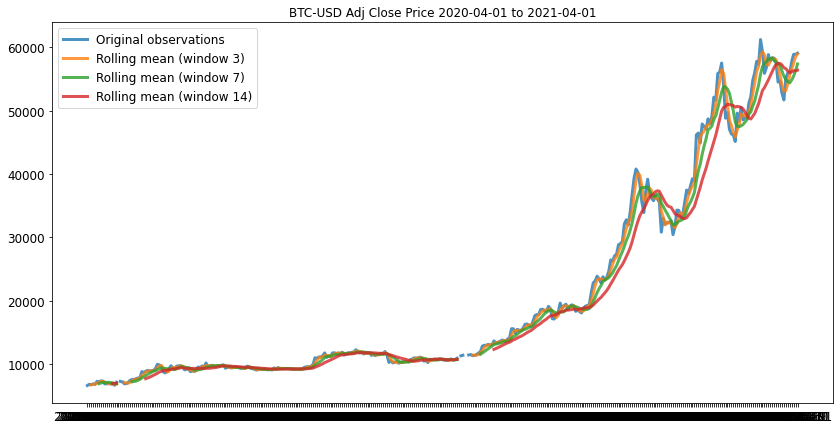

In [ ]:
#btc_adj = df['Adj Close']
#btc_recent = btc_adj.loc['2020-04-01':'2021-04-01']
#rroll_d3 = btc_recent.rolling(window=3).mean()
#rroll_d7 = btc_recent.rolling(window=7).mean()
#rroll_d14 = btc_recent.rolling(window=14).mean()
#plt.figure(figsize=(14, 7))
#plt.plot(btc_recent.index, btc_recent, lw=3, alpha=0.8,label='Original observations')
#plt.plot(btc_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
#plt.plot(btc_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
#plt.plot(btc_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')
#plt.title('BTC-USD Adj Close Price 2020-04-01 to 2021-04-01')
#plt.tick_params(labelsize=12)
#plt.legend(loc='upper left', fontsize=12)
#plt.show()